### Figure 8. Dynamics of imaginary-time Gross–Pitaevskii equation.
(*Right*) The first six POD modes of the mean-centered snapshot matrix $\mathbf{A}$, computed using the generalized Nyström SVD with SparseStack test matrices. The POD modes capture the dominant dynamics of quantized vortices forming within the Bose–Einstein condensate as it evolves toward a ground state.  

(*Left*) Ground-state density was generated locally in MATLAB.

---

In [1]:
cm_data = [
    [0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905],
    [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143],
    [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 0.779247619],
    [0.1252714286, 0.3242428571, 0.8302714286], [0.0591333333, 0.3598333333, 0.8683333333],
    [0.0116952381, 0.3875095238, 0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571],
    [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 0.8719571429],
    [0.0498142857, 0.4585714286, 0.8640571429], [0.0629333333, 0.4736904762, 0.8554380952],
    [0.0722666667, 0.4886666667, 0.8467], [0.0779428571, 0.5039857143, 0.8383714286],
    [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 0.8262714286],
    [0.0640571429, 0.5569857143, 0.8239571429], [0.0487714286, 0.5772238095, 0.8228285714],
    [0.0343428571, 0.5965809524, 0.819852381], [0.0265, 0.6137, 0.8135],
    [0.0238904762, 0.6286619048, 0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667],
    [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 0.7607190476],
    [0.0383714286, 0.6742714286, 0.743552381], [0.0589714286, 0.6837571429, 0.7253857143],
    [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429],
    [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 0.6424333333],
    [0.2178285714, 0.7250428571, 0.6192619048], [0.2586428571, 0.7317142857, 0.5954285714],
    [0.3021714286, 0.7376047619, 0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667],
    [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 0.5033142857],
    [0.4871238095, 0.7490619048, 0.4839761905], [0.5300285714, 0.7491142857, 0.4661142857],
    [0.5708571429, 0.7485190476, 0.4493904762], [0.609852381, 0.7473142857, 0.4336857143],
    [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333],
    [0.7184095238, 0.7411333333, 0.3904761905], [0.7524857143, 0.7384, 0.3768142857],
    [0.7858428571, 0.7355666667, 0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762],
    [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217],
    [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 0.2886428571],
    [0.9738952381, 0.7313952381, 0.266647619], [0.9937714286, 0.7454571429, 0.240347619],
    [0.9990428571, 0.7653142857, 0.2164142857], [0.9955333333, 0.7860571429, 0.196652381],
    [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857],
    [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309],
    [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 0.0948380952],
    [0.9661, 0.9514428571, 0.0755333333], [0.9763, 0.9831, 0.0538]
]
import scipy.io
import numpy as np
from matplotlib.colors import SymLogNorm

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import FancyBboxPatch
from matplotlib.colors import LogNorm, LinearSegmentedColormap
from matplotlib.ticker import LogLocator
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)


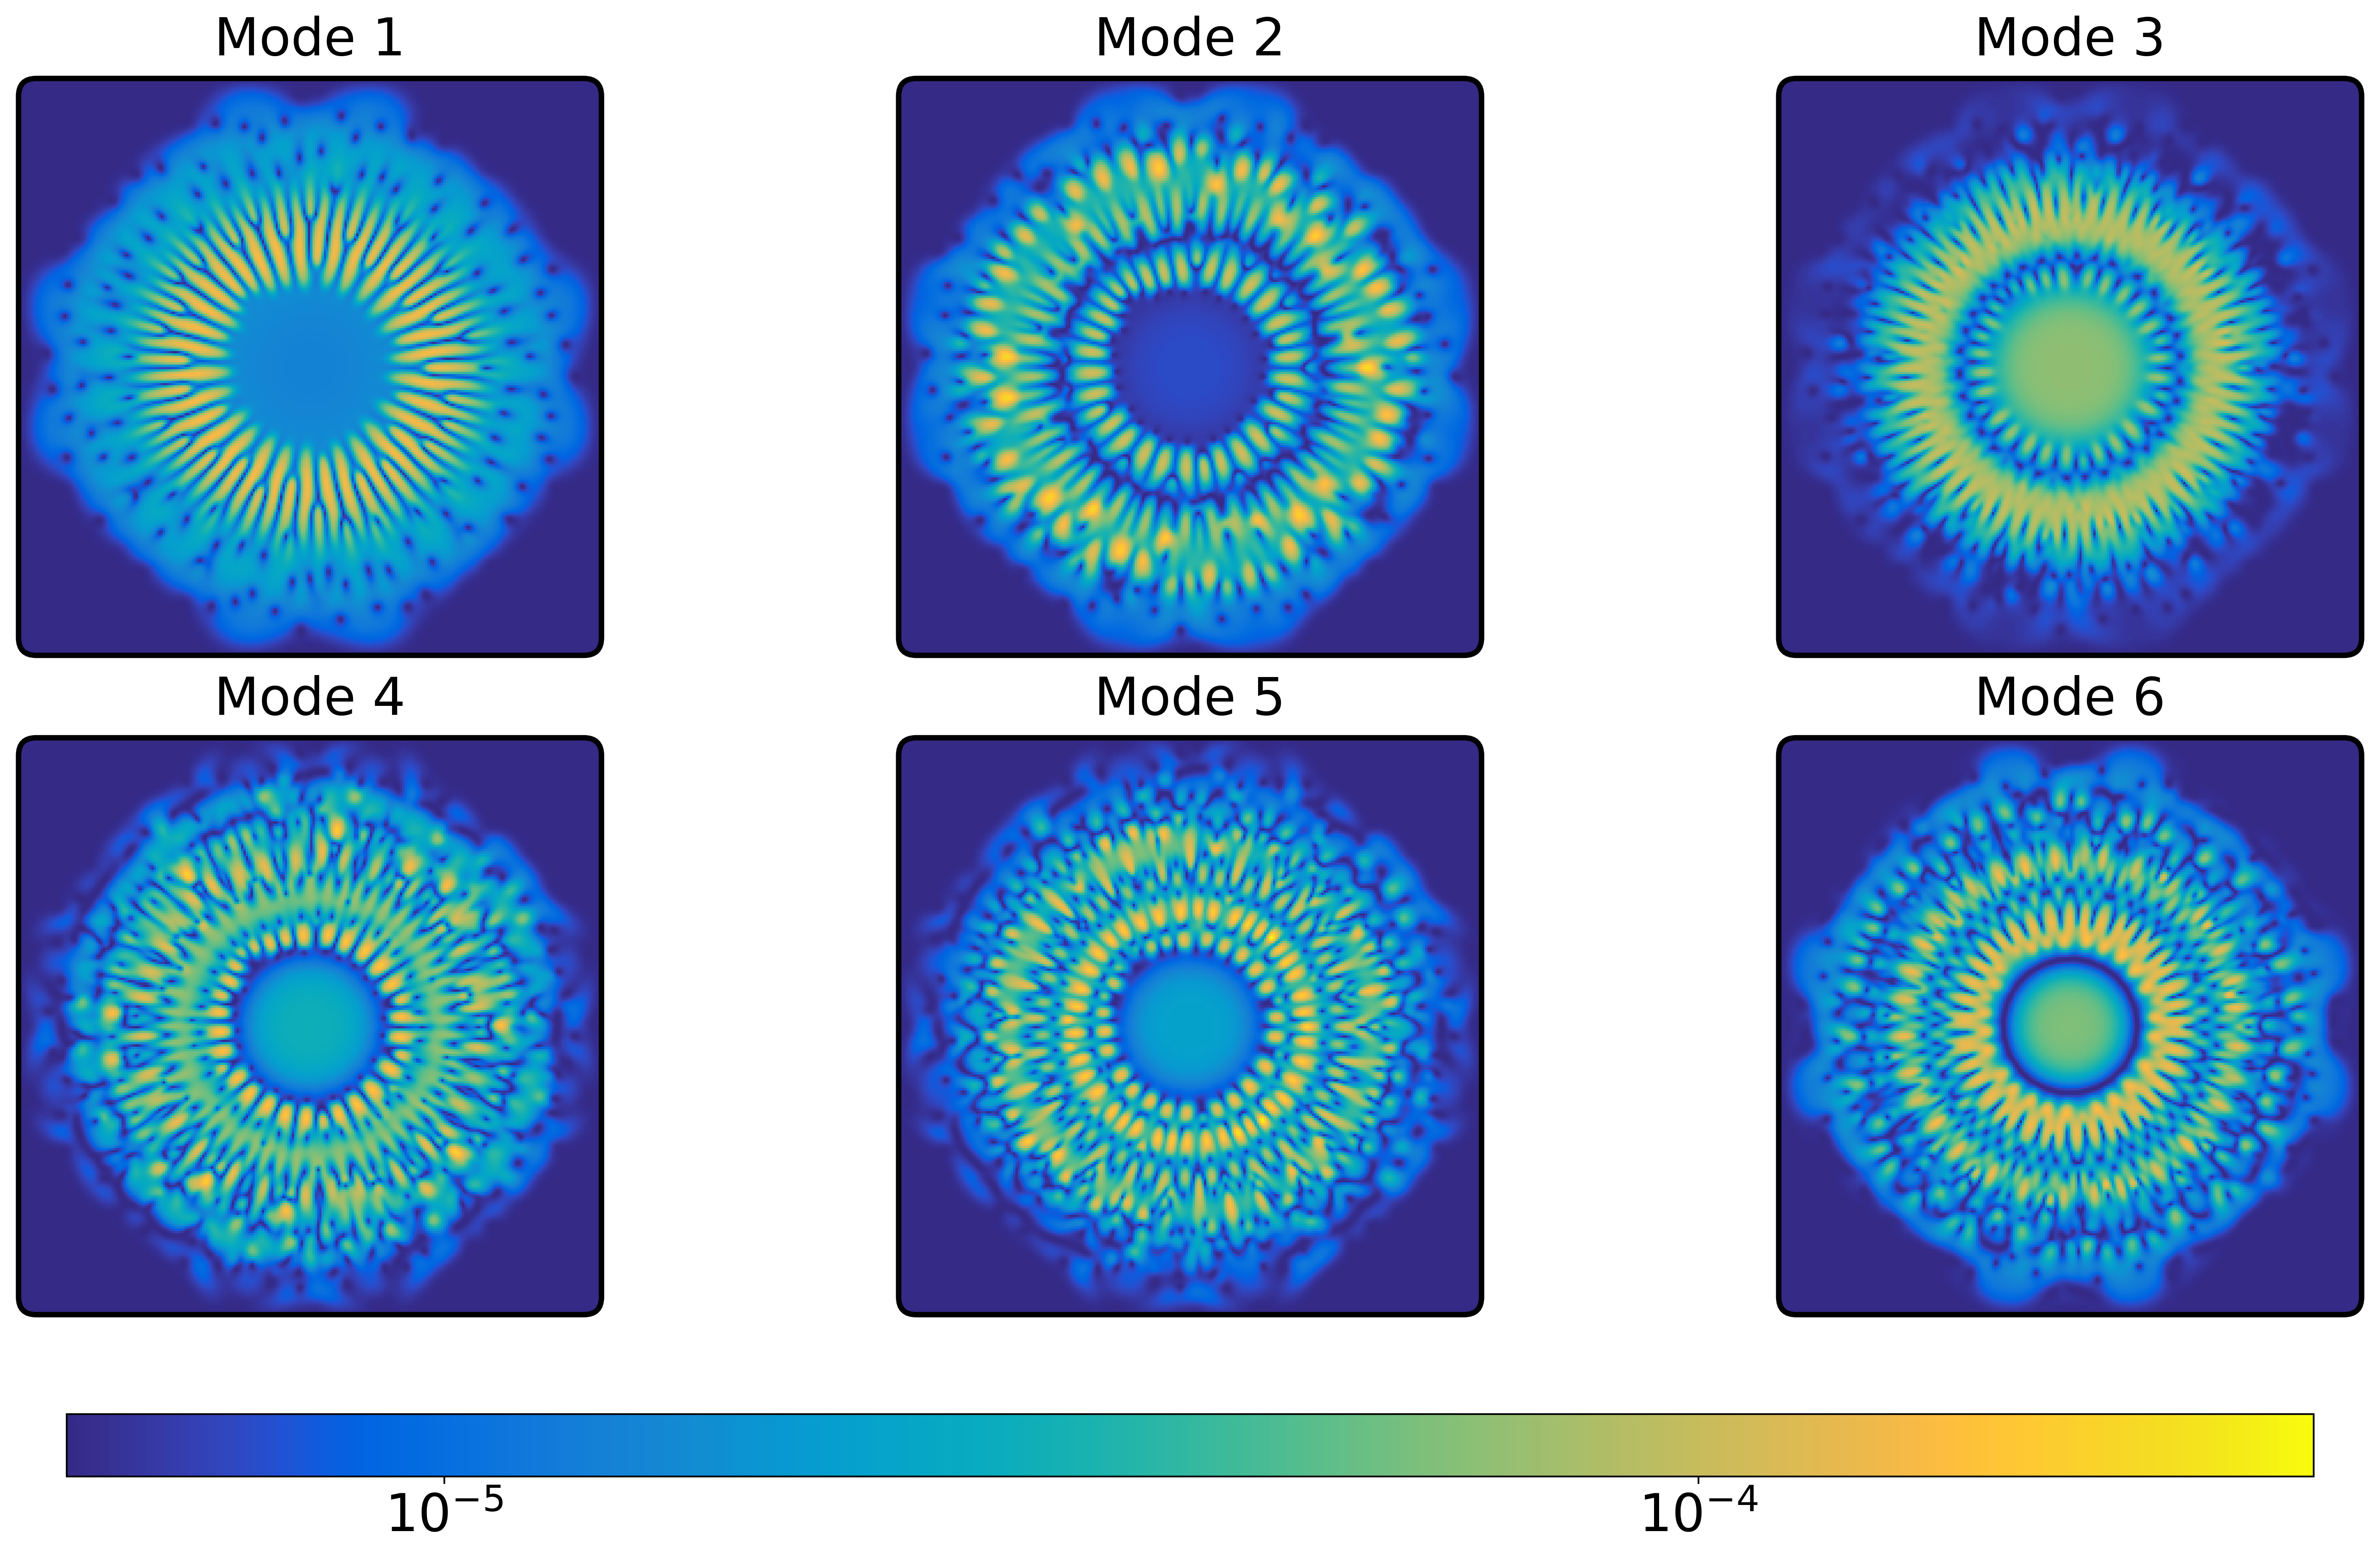

In [4]:
# load the MAT file
mat = scipy.io.loadmat(
    'data/pod_modes4.mat',
    struct_as_record=False, squeeze_me=True
)
PODm = mat['POD_modes']    # shape (Nx, Nx, ≥6)

Nx  = PODm.shape[0]
L   = 16.0
eps = 5e-6
x = np.linspace(-L, L, Nx)
X, Y = np.meshgrid(x, x)
densities = [np.abs(PODm[:, :, i])**2 + eps for i in range(6)]
vmax = max(d.max() for d in densities)
vmin = eps  

lin_thresh = eps
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 10), dpi=400)

gs = gridspec.GridSpec(
    2, 3, 
    figure=fig,
    wspace=0.0,    
    hspace=0.12,   
    left=0.03,     
    right=0.97,    
    top=0.92,      
    bottom=0.12     
)

axes = []
for i in range(2):
    for j in range(3):
        ax = fig.add_subplot(gs[i, j])
        axes.append(ax)

for idx, ax in enumerate(axes):
    ax.set_facecolor('none')
    ax.patch.set_alpha(0)
    
    # Create the image first
    im = ax.imshow(
        densities[idx],
        origin='lower',
        extent=[-L, L, -L, L],
        aspect='equal',
        cmap=parula_map,
        interpolation='none',
        interpolation_stage="data",
        norm=SymLogNorm(
            linthresh=lin_thresh,
            linscale=1.0,
            vmin=vmin,
            vmax=vmax
        ),
    )
    # levels = np.linspace(vmin, vmax, 4)   # choose 8 contour levels between floor and max
    # ax.contour(
    #     X, Y, densities[idx],
    #     levels=levels,
    #     colors='k',         # black lines
    #     linewidths=0.5,     # fairly thin
    #     alpha=0.4           # slight transparency so the color map still shows through
    # )
    # Create a rounded rectangle path for clipping
    from matplotlib.patches import FancyBboxPatch
    
    rounded_rect = FancyBboxPatch(
        (0.005, 0.01), 0.99, 0.98, 
        boxstyle="round,pad=0,rounding_size=0.03", 
        transform=ax.transAxes,
        facecolor='none',
        edgecolor='none'
    )
    
    clip_path = rounded_rect.get_path()
    clip_transform = rounded_rect.get_transform()
    
    im.set_clip_path(clip_path, transform=clip_transform)
    
    bezel = FancyBboxPatch(
        (0.005, 0.01), 0.99, 0.98,
        boxstyle="round,pad=0,rounding_size=0.03",
        transform=ax.transAxes,
        facecolor='none',       # hollow interior
        edgecolor='black',
        linewidth=2.5,          # Slightly thinner border
        clip_on=False,
        zorder=10               # well above the image
    )
    ax.add_patch(bezel)
    
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    ax.set_title(f"Mode {idx+1}", fontsize=24, pad=8)
    
    ax.margins(0)

cbar_ax = fig.add_axes([0.1, 0.02, 0.8, 0.04])  # [left, bottom, width, height]
cbar = fig.colorbar(
    mpl.cm.ScalarMappable(
        norm=SymLogNorm(
            linthresh=lin_thresh,
            linscale=1.0,
            vmin=vmin,
            vmax=vmax
        ),
        cmap=parula_map
    ),
    cax=cbar_ax,
    orientation='horizontal'
)

cbar.ax.tick_params(labelsize=24)
plt.savefig('fig8.png', dpi=400,
            bbox_inches='tight',  
            pad_inches=0.1) 
plt.show()